In [11]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
from IPython.display import Image

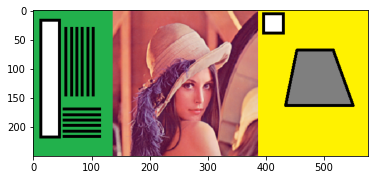

In [12]:
# Read the input image:
image = cv2.imread('Images/lena_image.png')

image = image[:,:,::-1] 
plt.imshow(image)

## Translation

**warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])**

* src: the source mage
* M: the transformation matrix
* dsize: size of the output image (width,height)
* dst: the output image
* flags: combination of interpolation methods such as INTER_LINEAR or INTER_NEAREST
* borderMode: the pixel extrapolation method
* borderValue: the value to be used in case of a constant border, has a default value of 0

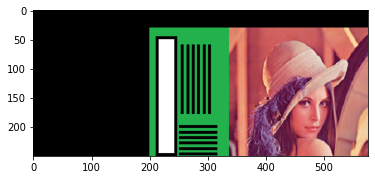

In [23]:
# Get the height and width of the image
height, width = image.shape[:2]

# Create the 2x3 transformation matrix making use of numpy array with float values (float32)
# Translation in the x direction: 200 pixels, and a translation in the y direction: 30 pixels

M = np.float32([[1, 0, 200], [0, 1, 30]])

# Once this transformation Matrix is created, we can pass it to the function cv2.warpAffine():
dst_image = cv2.warpAffine(image, M, (width, height))

# Display Images
plt.imshow(dst_image)

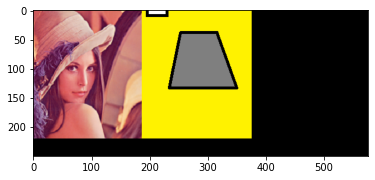

In [22]:
# Additionally, the translation can take negative values
M = np.float32([[1, 0, -200], [0, 1, -30]])
dst_image = cv2.warpAffine(image, M, (width, height))

# Display Images
plt.imshow(dst_image)

## Rotation

OpenCV provide a function cv2.getRotationMatrix2D() which takes center, angle and scale as arguments and outputs the transformation matrix.

**getRotationMatrix2D(center, angle, scale)**

* center: the center of rotation for the input image
* angle: the angle of rotation in degrees
* scale: an isotropic scale factor which scales the image up or down according to the value provided 

If the angle is positive, the image gets rotated in the counter-clockwise direction. If you want to rotate the image clockwise by the same amount, then the angle needs to be negative.

Once the transformation matrix (M) is calculated, pass it to the cv2.warpAffine() function that applies an affine transformation to an image. 

**dst = cv.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]] )**
 
* src: input image
* M: Transformation matrix
* dsize: size of the output image
* flags: interpolation method to be used

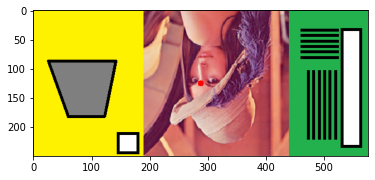

In [24]:
M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), 180, 1)
dst_image = cv2.warpAffine(image, M, (width, height))

# Show the center of rotation and the rotated image:
cv2.circle(dst_image, (round(width / 2.0), round(height / 2.0)), 5, (255, 0, 0), -1)

# Display Images
plt.imshow(dst_image)

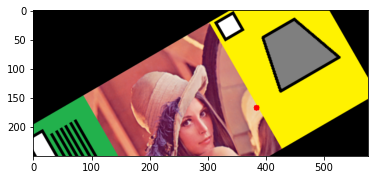

In [26]:
# Now, we are going to rotate the image 30 degrees changing the center of rotation
M = cv2.getRotationMatrix2D((width / 1.5, height / 1.5), 30, 1)
dst_image = cv2.warpAffine(image, M, (width, height))

# Show the center of rotation and the rotated image:
cv2.circle(dst_image, (round(width / 1.5), round(height / 1.5)), 5, (255, 0, 0), -1)

# Display the Image
plt.imshow(dst_image)

## Affine Transformation

OpenCV provides a function cv2.getAffineTransform() that takes as input the three pairs of corresponding points and outputs the transformation matrix.

**transform_mat = cv2.getAffineTransform(src, dst)**

* src: coordinates in the source image
* dst: coordinates in the output image

Once the transformation matrix (M) is calculated, pass it to the cv2.warpAffine() function that applies an affine transformation to an image.

**dst = cv.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]] )**
 
* src: input image
* M: Transformation matrix
* dsize: size of the output image
* flags: interpolation method to be used


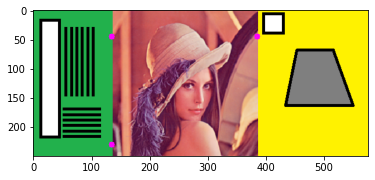

In [28]:
# A copy of the image is created to show the points that will be used for the affine transformation:
image_points = image.copy()
cv2.circle(image_points, (135, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (385, 45), 5, (255, 0, 255), -1)
cv2.circle(image_points, (135, 230), 5, (255, 0, 255), -1)

# Display Images
plt.imshow(image_points)

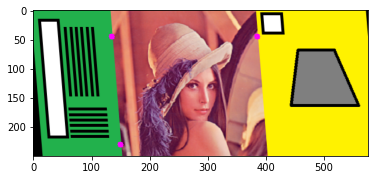

In [30]:
# We create the arrays with the aforementioned three points and the desired positions in the output image:
pts_1 = np.float32([[135, 45], [385, 45], [135, 230]])
pts_2 = np.float32([[135, 45], [385, 45], [150, 230]])

# We get the 2x3 tranformation matrix based on pts_1 and pts_2 and apply cv2.warpAffine():
M = cv2.getAffineTransform(pts_1, pts_2)
dst_image = cv2.warpAffine(image_points, M, (width, height))

# Display the Image
plt.imshow(dst_image)

## Perspective Transform

OpenCV provides a function cv2.getPerspectiveTransform() that takes as input the 4 pairs of corresponding points and outputs the transformation matrix. 

**transform_mat = cv2.getPerspectiveTransform(src, dst)**

* src: coordinates in the source image
* dst: coordinates in the output image

Once the transformation matrix (M) is calculated, pass it to the cv2.warpPerspective() function that applies the perspective transformation to an image. The syntax of this function is given below.

**dst = cv.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]] )**
 
* src: input image
* M: Transformation matrix
* dsize: size of the output image
* flags: interpolation method to be used

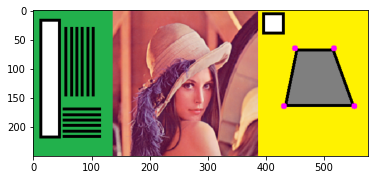

In [32]:
# A copy of the image is created to show the points that will be used for the perspective transformation:
image_points = image.copy()
cv2.circle(image_points, (450, 65), 5, (255, 0, 255), -1)
cv2.circle(image_points, (517, 65), 5, (255, 0, 255), -1)
cv2.circle(image_points, (431, 164), 5, (255, 0, 255), -1)
cv2.circle(image_points, (552, 164), 5, (255, 0, 255), -1)

# Display Images
plt.imshow(image_points)